# Generatives Trainig mit DeepHull loss, generatives und normales Netz trainieren unabhängig voneinander

In [1]:
import numpy as np
import torch

from script.Networks import ICNN
from script.Networks import SequentialNN
from torch.utils.data import DataLoader
from script.dataInit import ConvexDataset, Rhombus
from script.trainFunction import train_icnn_adversarial, train_icnn
from script.eval import Plots_for
from script.Verification import verification

In [2]:
icnn = ICNN([2, 10, 10, 1])
adversarial = SequentialNN([2, 10, 10, 2])
epochs = 5
batch_size = 1

number_of_adversarial_samples = 1000
number_of_train_samples = 10000
hyper_lambda = 1
x_range = [-1.5, 1.5]
y_range = [-1.5, 1.5]

In [3]:
included_space, ambient_space = Rhombus().get_uniform_samples(number_of_train_samples, x_range, y_range) #samples will be split in inside and outside the rhombus
true_extremal_points = Rhombus().get_extremal_points()
dataset = ConvexDataset(data=included_space)
train_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
dataset = ConvexDataset(data= ambient_space)
ambient_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [4]:
random_samples = []
for i in range(number_of_adversarial_samples): # generate random samples
    x = np.random.default_rng().uniform(low=x_range[0], high=x_range[1])
    y = np.random.default_rng().uniform(low=y_range[0], high=y_range[1])
    random_samples.append([[x, y]])

value = torch.tensor(random_samples, requires_grad=True, dtype=torch.float32)
adversarial_set = ConvexDataset(data=value)
adversarial_loader = DataLoader(adversarial_set, batch_size=batch_size, shuffle=True)


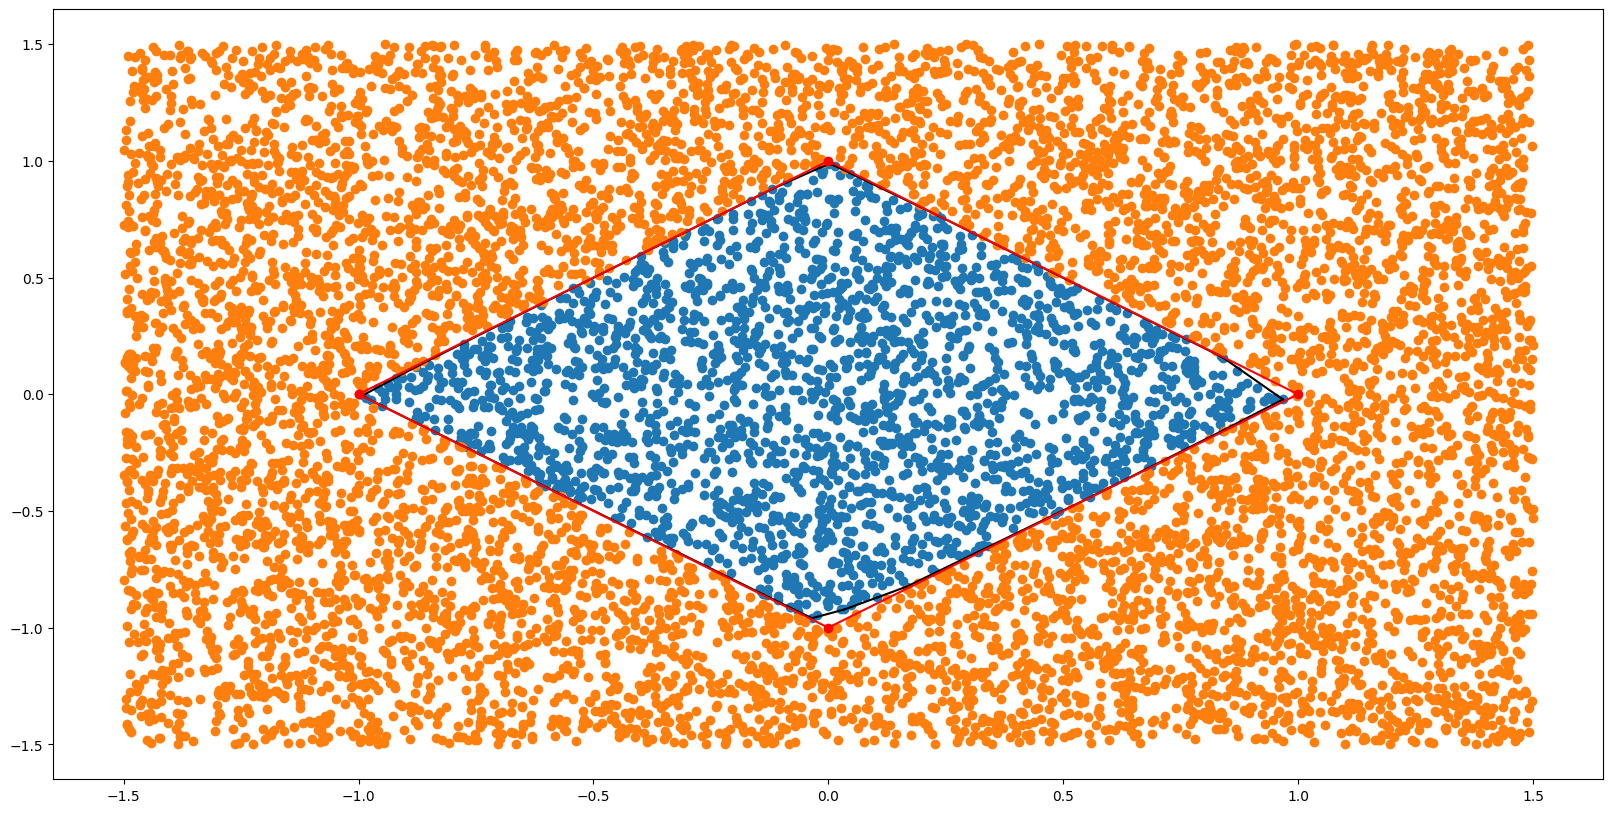

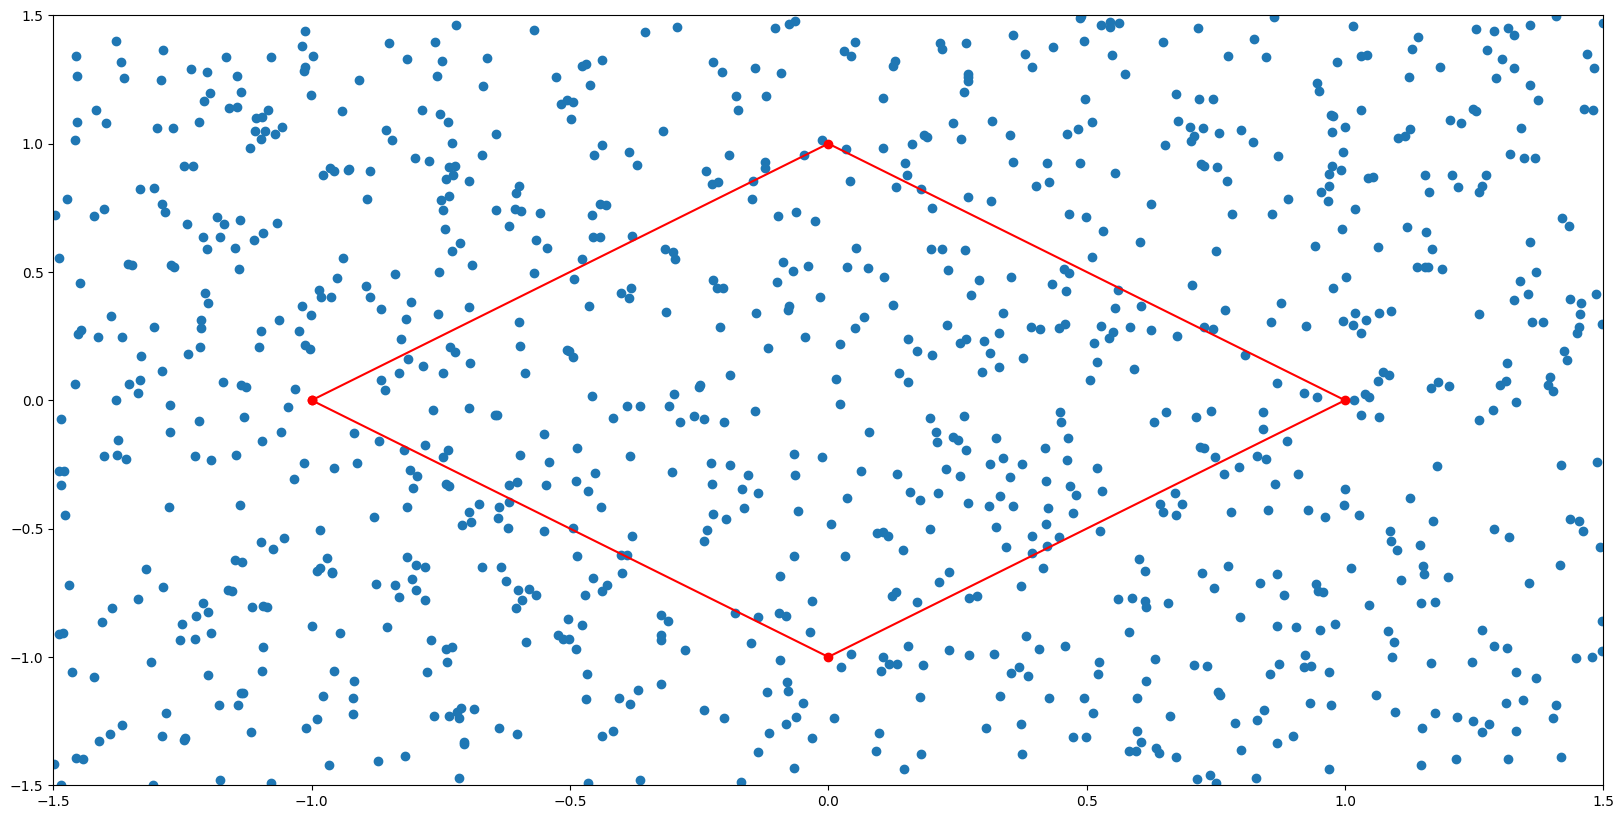

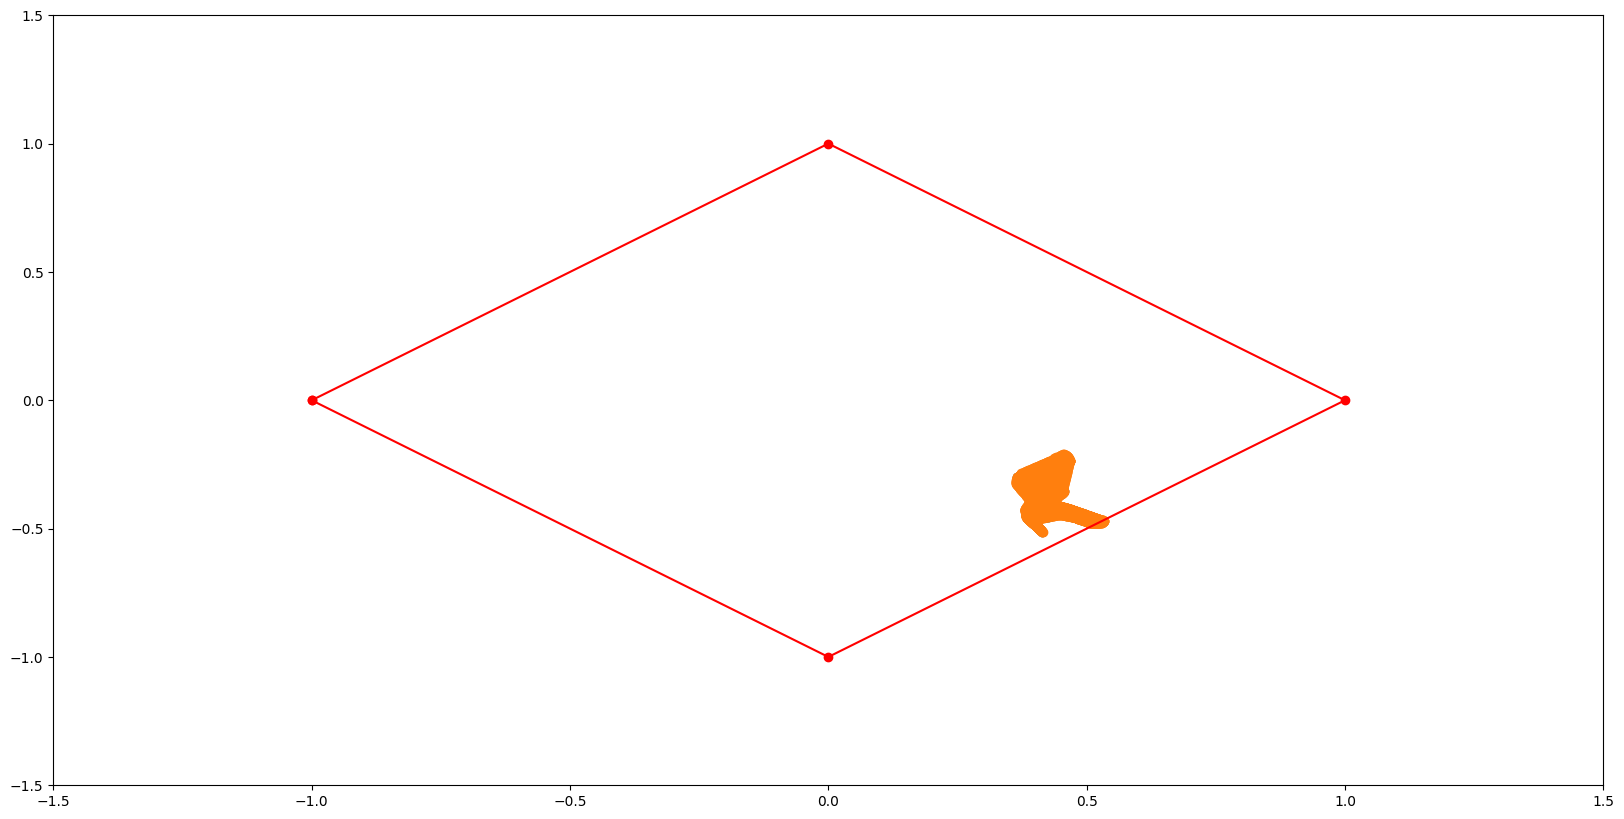

In [5]:
plots = Plots_for(0, icnn, included_space, ambient_space, true_extremal_points, x_range, y_range, adversarial=adversarial, adversarial_values=value)
plots.plt_initial()

plots.plt_adversarial_initial()
plots.plt_adversarial_dotted()


=== Epoch: 0===
batch = 0, mean loss = 0.9756914973258972
batch = 100, mean loss = 1.3463512358098928
batch = 200, mean loss = 1.3597393163401097
batch = 300, mean loss = 1.3429990874176405
batch = 400, mean loss = 1.3263933836967867
batch = 500, mean loss = 1.2981737635568706
batch = 600, mean loss = 1.2645109267084056
batch = 700, mean loss = 1.2340603144294695
batch = 800, mean loss = 1.2124864872772894
batch = 900, mean loss = 1.1932268568069635
batch = 1000, mean loss = 1.1745506891242037
batch = 1100, mean loss = 1.154108314650585
batch = 1200, mean loss = 1.1311058625640917
batch = 1300, mean loss = 1.111769781856698
batch = 1400, mean loss = 1.091180724301226
batch = 1500, mean loss = 1.0738816633572346
batch = 1600, mean loss = 1.0563911916426314
batch = 1700, mean loss = 1.0397180866522344
batch = 1800, mean loss = 1.0227699486961768
batch = 1900, mean loss = 1.007486150867998
batch = 2000, mean loss = 0.9952569360929033
batch = 2100, mean loss = 0.976899425233619
batch = 220

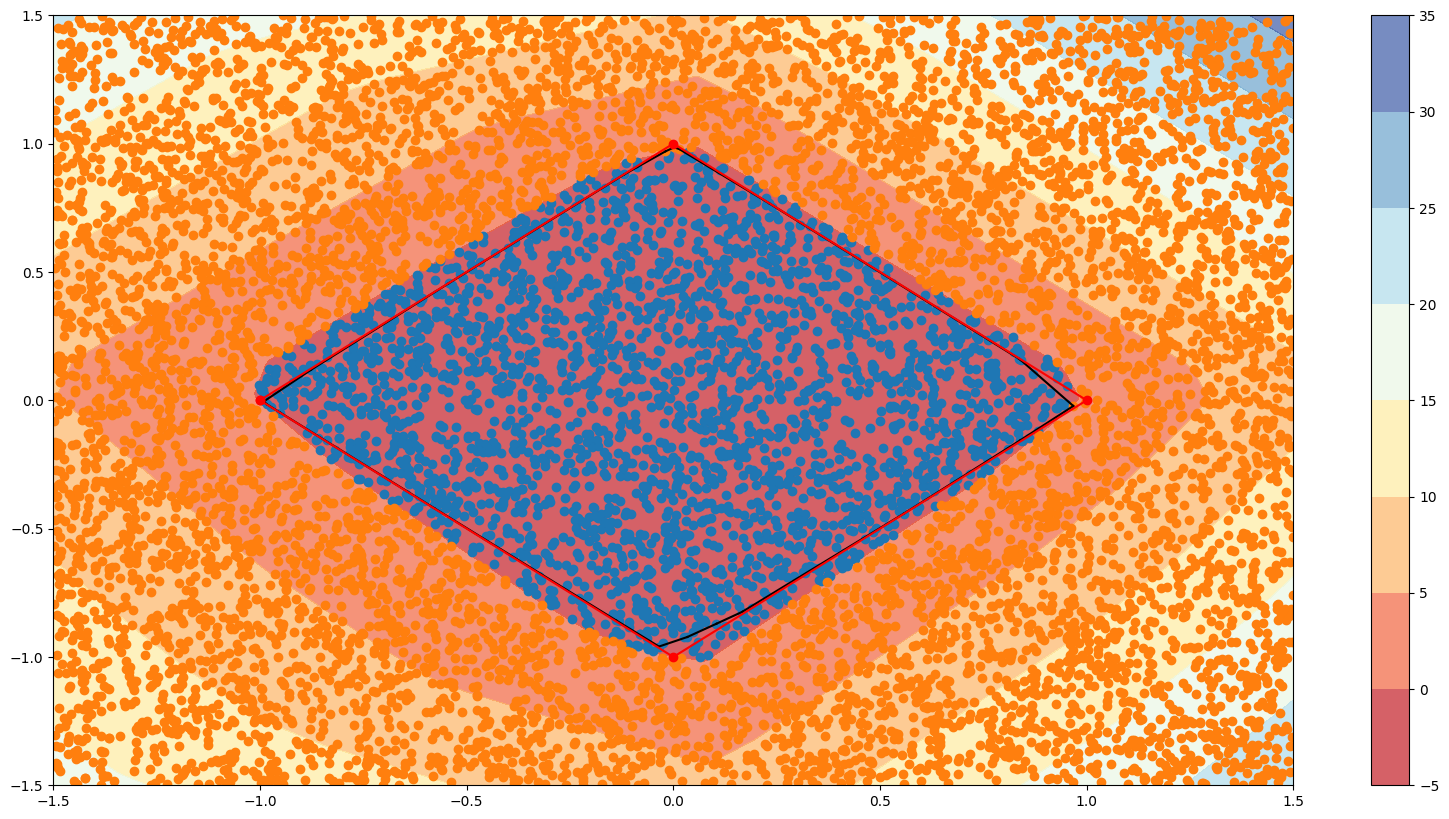

In [6]:
history = train_icnn(icnn, train_loader, ambient_loader, epochs=epochs, hyper_lambda=hyper_lambda)
plots.plt_mesh()

In [7]:
history = train_icnn_adversarial(icnn, adversarial, train_loader, adversarial_loader, epochs=epochs, train_ICNN=False, hyper_lambda=hyper_lambda)

=== Epoch: 0===
batch = 0, mean loss = 3.144024610519409, l_pos = 0.041258033365011215, l_neg = 3.055675745010376, l_gen = 0.047090884298086166
batch = 100, mean loss = 1.5063465149095743, l_pos = 0.08601950208591942, l_neg = 0.8609454481963916, l_gen = 0.5593815607820997
batch = 200, mean loss = 1.303325418216079, l_pos = 0.0864644793802826, l_neg = 0.4827791095904737, l_gen = 0.7340818268260849
batch = 300, mean loss = 1.2243211265418221, l_pos = 0.07822621979462942, l_neg = 0.3422152451695905, l_gen = 0.8038796591278524
batch = 400, mean loss = 1.1911904009203067, l_pos = 0.08115445041188278, l_neg = 0.2657989380536299, l_gen = 0.8442370107402082
batch = 500, mean loss = 1.1682835205824313, l_pos = 0.08006031520501106, l_neg = 0.2178296963547165, l_gen = 0.8703935075469479
batch = 600, mean loss = 1.1533214377484187, l_pos = 0.07968642840629905, l_neg = 0.18539752347033375, l_gen = 0.888237485615614
batch = 700, mean loss = 1.1418619744277714, l_pos = 0.07867056159262735, l_neg = 0.

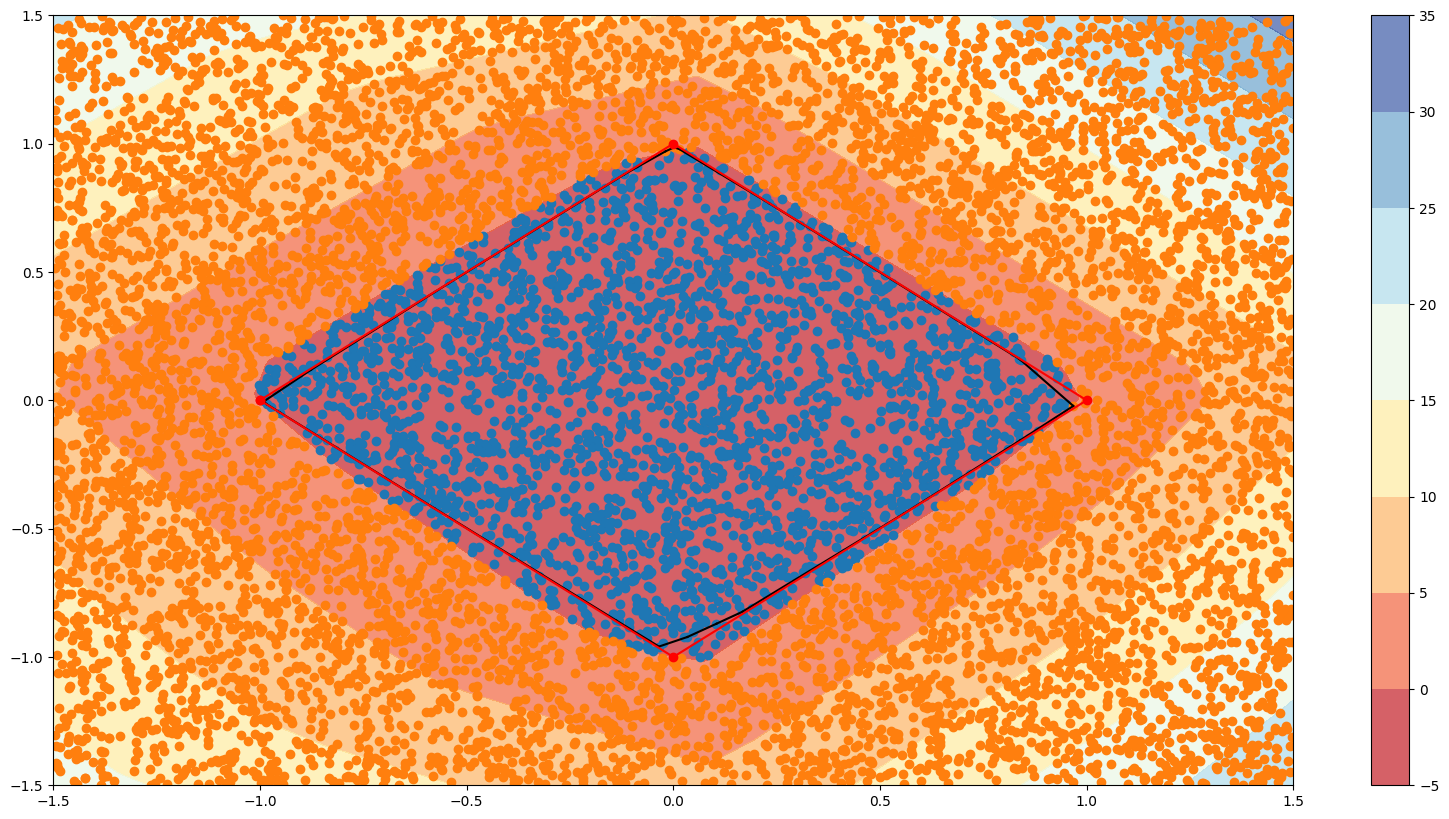

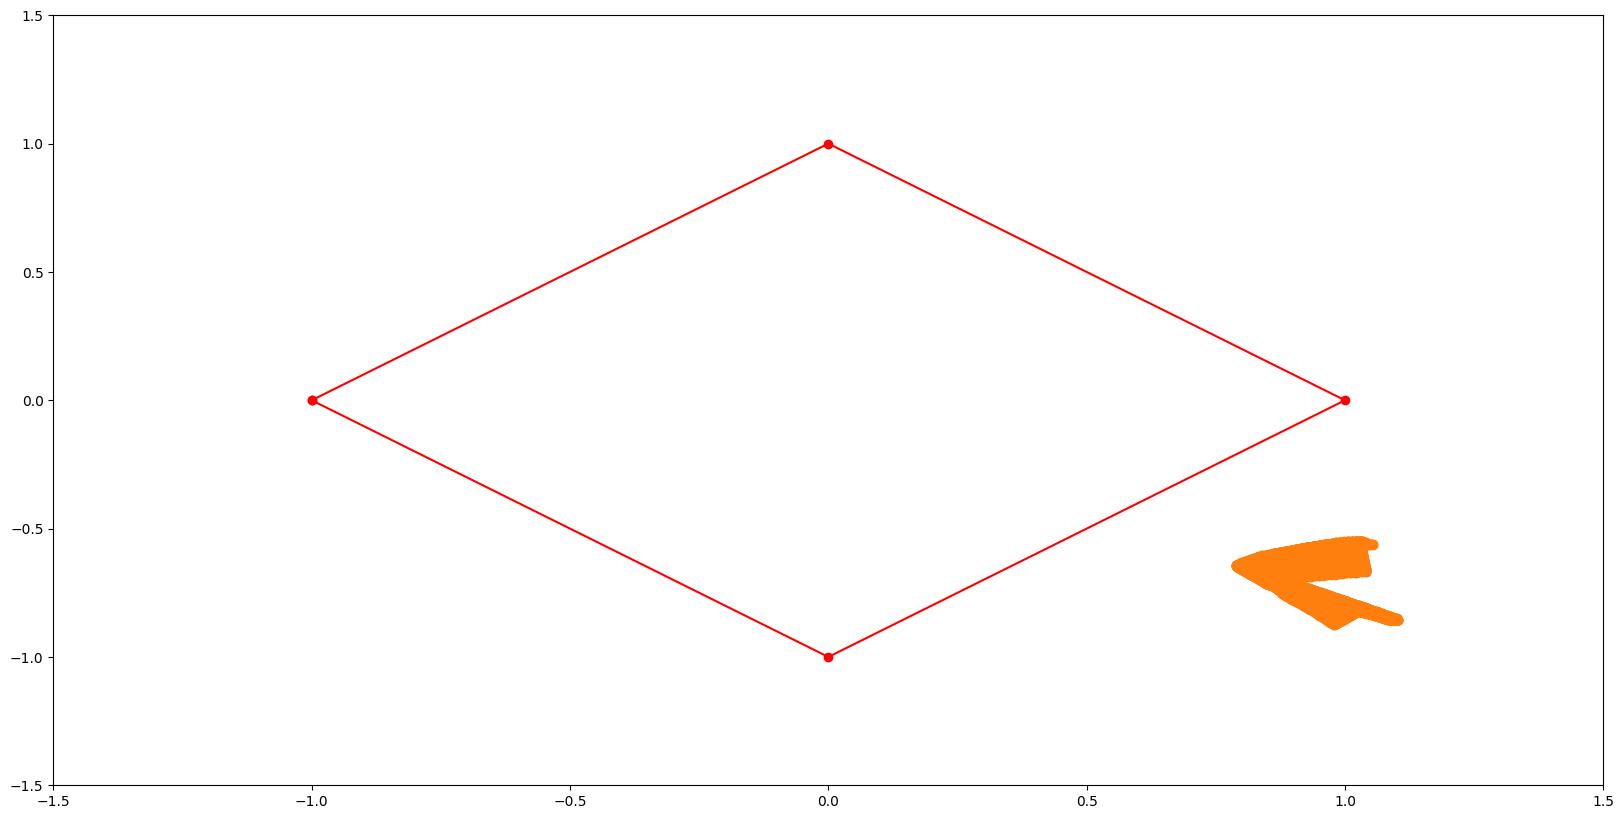

In [8]:
plots.plt_mesh()
plots.plt_adversarial_dotted()